In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
from graphviz import Graph

from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from jupyterthemes import jtplot
jtplot.style()

from acquire import get_telco_data
from prepare import clean_telco
import explore

plt.rcParams['figure.figsize'] = (4, 2)

In [2]:
telco = get_telco_data()
telco = clean_telco(telco)
telco.to_csv('telco_clean.csv')

In [3]:
telco.head(1)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner,dependents,phone_service,paperless_billing,...,Month_to_month,One_year_contract,Two_year_contract,DSL,Fiber_optic,No_internet,Bank_transfer_(automatic),Credit_card_(automatic),Electronic_check,Mailed_check
0,0003-MKNFE,0,9,59.9,542.4,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [4]:
train, validate, test = explore.train_validate_test_split(telco,'churn', seed=4545)
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 415 to 5394
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                3943 non-null   object 
 1   senior_citizen             3943 non-null   int64  
 2   tenure                     3943 non-null   int64  
 3   monthly_charges            3943 non-null   float64
 4   total_charges              3943 non-null   float64
 5   gender_Male                3943 non-null   uint8  
 6   partner                    3943 non-null   uint8  
 7   dependents                 3943 non-null   uint8  
 8   phone_service              3943 non-null   uint8  
 9   paperless_billing          3943 non-null   uint8  
 10  churn                      3943 non-null   uint8  
 11  online_security            3943 non-null   uint8  
 12  online_backup              3943 non-null   uint8  
 13  device_protection          3943 non-null   uin

In [6]:
train.DSL.value_counts(), train['churn'].value_counts()

(0    2585
 1    1358
 Name: DSL, dtype: int64,
 0    2897
 1    1046
 Name: churn, dtype: int64)

In [7]:
cat_vars = ['gender_Male',
            'senior_citizen',
            'partner',
            'dependents',
            'phone_service',
            'paperless_billing',
            'churn',
            'online_security',
            'online_backup',
            'device_protection',
            'tech_support',
            'streaming_tv',
            'streaming_movies',
            'multiple_lines',
            'Month_to_month',
            'One_year_contract',
            'Two_year_contract',
            'DSL',
            'Fiber_optic',
            'No_internet',
            'Bank_transfer_(automatic)',
            'Credit_card_(automatic)',
            'Electronic_check',
            'Mailed_check']

quant_vars = ['tenure', 'monthly_charges', 'total_charges']

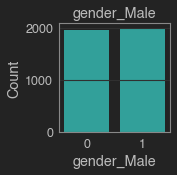

   gender_Male  Count  Percent
1            1   1984    50.32
0            0   1959    49.68
_________________________________________________________________


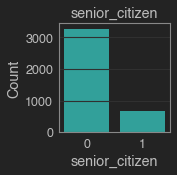

   senior_citizen  Count  Percent
0               0   3280    83.19
1               1    663    16.81
_________________________________________________________________


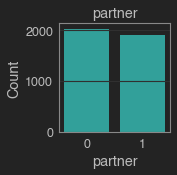

   partner  Count  Percent
0        0   2033    51.56
1        1   1910    48.44
_________________________________________________________________


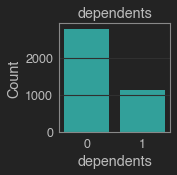

   dependents  Count  Percent
0           0   2792    70.81
1           1   1151    29.19
_________________________________________________________________


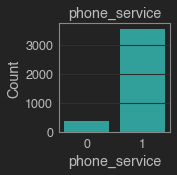

   phone_service  Count  Percent
1              1   3543    89.86
0              0    400    10.14
_________________________________________________________________


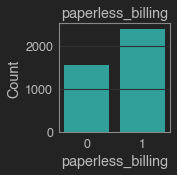

   paperless_billing  Count  Percent
1                  1   2397    60.79
0                  0   1546    39.21
_________________________________________________________________


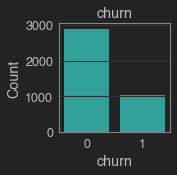

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


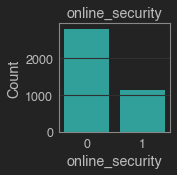

   online_security  Count  Percent
0                0   2808    71.21
1                1   1135    28.79
_________________________________________________________________


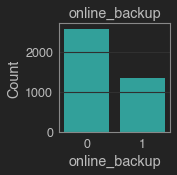

   online_backup  Count  Percent
0              0   2584    65.53
1              1   1359    34.47
_________________________________________________________________


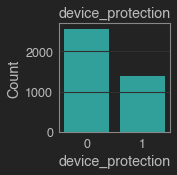

   device_protection  Count  Percent
0                  0   2563     65.0
1                  1   1380     35.0
_________________________________________________________________


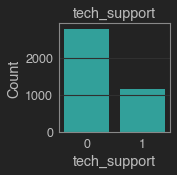

   tech_support  Count  Percent
0             0   2786    70.66
1             1   1157    29.34
_________________________________________________________________


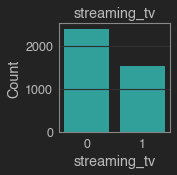

   streaming_tv  Count  Percent
0             0   2404    60.97
1             1   1539    39.03
_________________________________________________________________


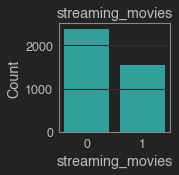

   streaming_movies  Count  Percent
0                 0   2386    60.51
1                 1   1557    39.49
_________________________________________________________________


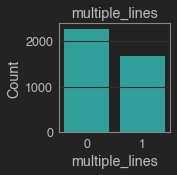

   multiple_lines  Count  Percent
0               0   2269    57.55
1               1   1674    42.45
_________________________________________________________________


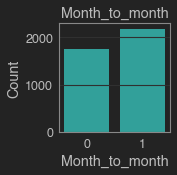

   Month_to_month  Count  Percent
1               1   2186    55.44
0               0   1757    44.56
_________________________________________________________________


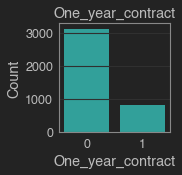

   One_year_contract  Count  Percent
0                  0   3121    79.15
1                  1    822    20.85
_________________________________________________________________


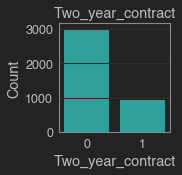

   Two_year_contract  Count  Percent
0                  0   3008    76.29
1                  1    935    23.71
_________________________________________________________________


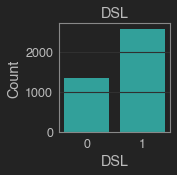

   DSL  Count  Percent
0    1   2585    65.56
1    0   1358    34.44
_________________________________________________________________


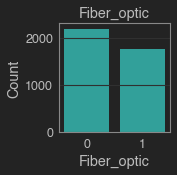

   Fiber_optic  Count  Percent
0            0   2190    55.54
1            1   1753    44.46
_________________________________________________________________


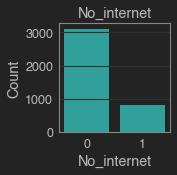

   No_internet  Count  Percent
0            0   3111     78.9
1            1    832     21.1
_________________________________________________________________


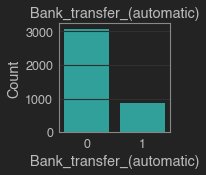

   Bank_transfer_(automatic)  Count  Percent
0                          0   3083    78.19
1                          1    860    21.81
_________________________________________________________________


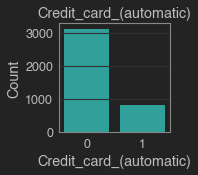

   Credit_card_(automatic)  Count  Percent
0                        0   3122    79.18
1                        1    821    20.82
_________________________________________________________________


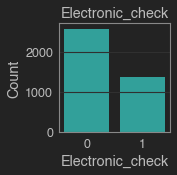

   Electronic_check  Count  Percent
0                 0   2577    65.36
1                 1   1366    34.64
_________________________________________________________________


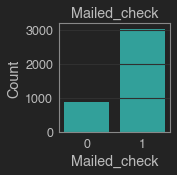

   Mailed_check  Count  Percent
0             1   3047    77.28
1             0    896    22.72
_________________________________________________________________


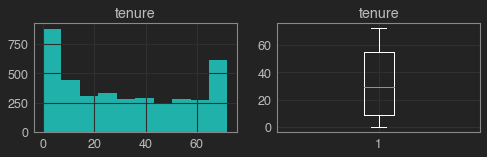

count    3943.000000
mean       32.365204
std        24.430116
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


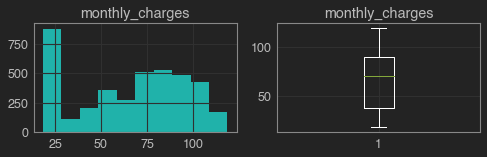

count    3943.000000
mean       65.128329
std        30.049253
min        18.400000
25%        37.475000
50%        70.450000
75%        90.100000
max       118.750000
Name: monthly_charges, dtype: float64


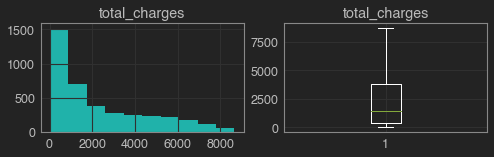

count    3943.000000
mean     2280.987497
std      2252.862892
min        18.800000
25%       415.725000
50%      1415.000000
75%      3831.850000
max      8672.450000
Name: total_charges, dtype: float64


In [8]:
explore.explore_univariate(train, cat_vars, quant_vars)

### Univariate Takeaways
- 27% of total customers have churned
- Gender distribution is roughly 50/50
- Only 17% of customers are seniors
- 55% of total customers are on month-to-month contract type
- median tenure is 29 months

gender_Male 
_____________________

       chi2   p-value  degrees of freedom
0  0.120725  0.728249                   1

observed:
 churn           0     1   All
gender_Male                  
0            1434   525  1959
1            1463   521  1984
All          2897  1046  3943

expected:
              0           1
0  1439.316003  519.683997
1  1457.683997  526.316003


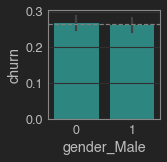


_____________________

senior_citizen 
_____________________

       chi2       p-value  degrees of freedom
0  107.7438  3.058678e-25                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2518   762  3280
1                379   284   663
All             2897  1046  3943

expected:
              0           1
0  2409.880801  870.119199
1   487.119199  175.880801


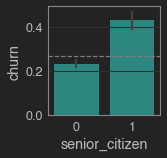


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  82.955788  8.390929e-20                   1

observed:
 churn       0     1   All
partner                  
0        1367   666  2033
1        1530   380  1910
All      2897  1046  3943

expected:
              0           1
0  1493.685265  539.314735
1  1403.314735  506.685265


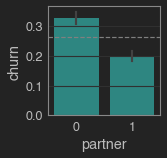


_____________________

dependents 
_____________________

        chi2       p-value  degrees of freedom
0  99.685041  1.786656e-23                   1

observed:
 churn          0     1   All
dependents                  
0           1925   867  2792
1            972   179  1151
All         2897  1046  3943

expected:
             0          1
0  2051.33756  740.66244
1   845.66244  305.33756


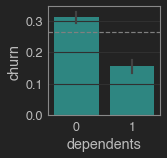


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  8.647016  0.003276                   1

observed:
 churn             0     1   All
phone_service                  
0               319    81   400
1              2578   965  3543
All            2897  1046  3943

expected:
              0           1
0   293.887903  106.112097
1  2603.112097  939.887903


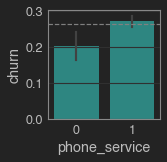


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  146.154668  1.200960e-33                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1300   246  1546
1                  1597   800  2397
All                2897  1046  3943

expected:
              0           1
0  1135.876744  410.123256
1  1761.123256  635.876744


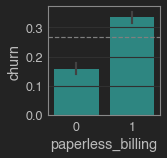


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 churn     0     1   All
churn                  
0      2897     0  2897
1         0  1046  1046
All    2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


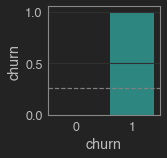


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  101.724858  6.379476e-24                   1

observed:
 churn               0     1   All
online_security                  
0                1936   872  2808
1                 961   174  1135
All              2897  1046  3943

expected:
              0           1
0  2063.093076  744.906924
1   833.906924  301.093076


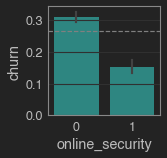


_____________________

online_backup 
_____________________

       chi2   p-value  degrees of freedom
0  20.06437  0.000007                   1

observed:
 churn             0     1   All
online_backup                  
0              1839   745  2584
1              1058   301  1359
All            2897  1046  3943

expected:
              0           1
0  1898.515851  685.484149
1   998.484149  360.515851


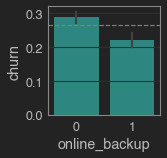


_____________________

device_protection 
_____________________

       chi2   p-value  degrees of freedom
0  6.452204  0.011081                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1849   714  2563
1                  1048   332  1380
All                2897  1046  3943

expected:
              0           1
0  1883.086736  679.913264
1  1013.913264  366.086736


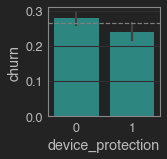


_____________________

tech_support 
_____________________

        chi2       p-value  degrees of freedom
0  82.178786  1.243171e-19                   1

observed:
 churn            0     1   All
tech_support                  
0             1932   854  2786
1              965   192  1157
All           2897  1046  3943

expected:
              0           1
0  2046.929242  739.070758
1   850.070758  306.929242


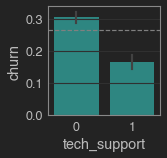


_____________________

streaming_tv 
_____________________

        chi2       p-value  degrees of freedom
0  24.717308  6.638534e-07                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1834   570  2404
1             1063   476  1539
All           2897  1046  3943

expected:
              0           1
0  1766.266295  637.733705
1  1130.733705  408.266295


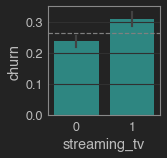


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  19.904815  0.000008                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1814   572  2386
1                 1083   474  1557
All               2897  1046  3943

expected:
              0           1
0  1753.041339  632.958661
1  1143.958661  413.041339


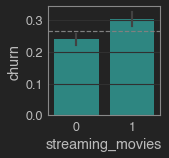


_____________________

multiple_lines 
_____________________

        chi2   p-value  degrees of freedom
0  18.805646  0.000014                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1727   542  2269
1               1170   504  1674
All             2897  1046  3943

expected:
              0           1
0  1667.079128  601.920872
1  1229.920872  444.079128


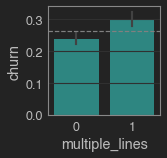


_____________________

Month_to_month 
_____________________

         chi2        p-value  degrees of freedom
0  607.444934  4.022381e-134                   1

observed:
 churn              0     1   All
Month_to_month                  
0               1631   126  1757
1               1266   920  2186
All             2897  1046  3943

expected:
              0           1
0  1290.902612  466.097388
1  1606.097388  579.902612


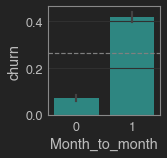


_____________________

One_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  110.844356  6.400351e-26                   1

observed:
 churn                 0     1   All
One_year_contract                  
0                  2174   947  3121
1                   723    99   822
All                2897  1046  3943

expected:
             0          1
0  2293.06036  827.93964
1   603.93964  218.06036


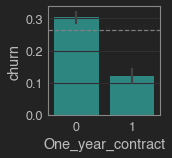


_____________________

Two_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  349.843446  4.583861e-78                   1

observed:
 churn                 0     1   All
Two_year_contract                  
0                  1989  1019  3008
1                   908    27   935
All                2897  1046  3943

expected:
              0           1
0  2210.037028  797.962972
1   686.962972  248.037028


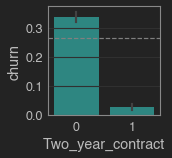


_____________________

DSL 
_____________________

        chi2       p-value  degrees of freedom
0  86.833413  1.180580e-20                   1

observed:
 churn     0     1   All
DSL                    
0      1776   809  2585
1      1121   237  1358
All    2897  1046  3943

expected:
              0           1
0  1899.250571  685.749429
1   997.749429  360.250571


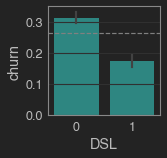


_____________________

Fiber_optic 
_____________________

         chi2       p-value  degrees of freedom
0  435.451953  1.057519e-96                   1

observed:
 churn           0     1   All
Fiber_optic                  
0            1897   293  2190
1            1000   753  1753
All          2897  1046  3943

expected:
              0           1
0  1609.036267  580.963733
1  1287.963733  465.036267


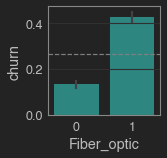


_____________________

No_internet 
_____________________

        chi2       p-value  degrees of freedom
0  210.76221  9.366439e-48                   1

observed:
 churn           0     1   All
No_internet                  
0            2121   990  3111
1             776    56   832
All          2897  1046  3943

expected:
              0           1
0  2285.713163  825.286837
1   611.286837  220.713163


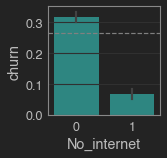


_____________________

Bank_transfer_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  40.261682  2.221231e-10                   1

observed:
 churn                         0     1   All
Bank_transfer_(automatic)                  
0                          2192   891  3083
1                           705   155   860
All                        2897  1046  3943

expected:
              0           1
0  2265.141009  817.858991
1   631.858991  228.141009


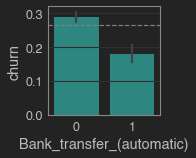


_____________________

Credit_card_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  71.674563  2.537832e-17                   1

observed:
 churn                       0     1   All
Credit_card_(automatic)                  
0                        2198   924  3122
1                         699   122   821
All                      2897  1046  3943

expected:
             0          1
0  2293.79508  828.20492
1   603.20492  217.79508


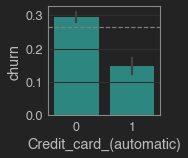


_____________________

Electronic_check 
_____________________

         chi2       p-value  degrees of freedom
0  339.705115  7.397611e-76                   1

observed:
 churn                0     1   All
Electronic_check                  
0                 2137   440  2577
1                  760   606  1366
All               2897  1046  3943

expected:
              0           1
0  1893.372813  683.627187
1  1003.627187  362.372813


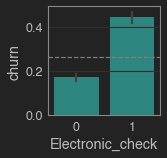


_____________________

Mailed_check 
_____________________

        chi2       p-value  degrees of freedom
0  40.787143  1.697462e-10                   1

observed:
 churn            0     1   All
Mailed_check                  
0             2164   883  3047
1              733   163   896
All           2897  1046  3943

expected:
              0           1
0  2238.691098  808.308902
1   658.308902  237.691098


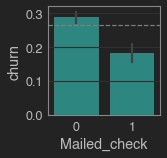


_____________________

tenure 
____________________



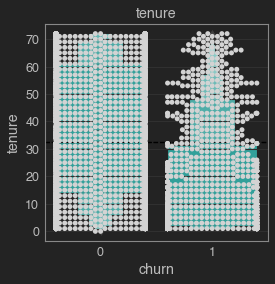

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.225406  24.155257  0.0  14.0  37.0  61.0  72.0
1      1046.0  18.904398  19.686501  1.0   2.0  11.0  31.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2198265.0, pvalue=5.2432815069471204e-104)

____________________

monthly_charges 
____________________



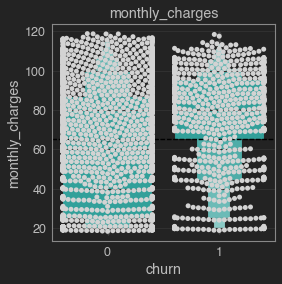

        count       mean        std    min      25%   50%    75%     max
churn                                                                   
0      2897.0  61.089368  30.927897  18.40  25.1000  64.2  86.65  118.75
1      1046.0  76.314627  24.184011  18.85  65.2125  80.5  95.05  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1087481.0, pvalue=7.816354204090865e-42)

____________________

total_charges 
____________________



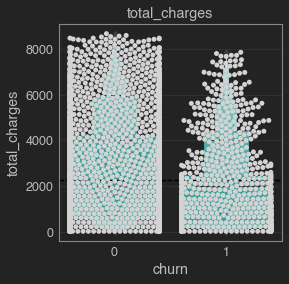

        count         mean          std    min      25%       50%        75%  \
churn                                                                          
0      2897.0  2515.925630  2317.679644  18.80  564.350  1654.450  4192.1500   
1      1046.0  1630.303203  1918.970319  18.85  154.975   830.775  2429.5625   

           max  
churn           
0      8672.45  
1      7856.00   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1908154.5, pvalue=1.3342993074757393e-35)

____________________



In [9]:
explore.explore_bivariate(train,'churn', cat_vars, quant_vars)

In [10]:
train.dtypes

customer_id                   object
senior_citizen                 int64
tenure                         int64
monthly_charges              float64
total_charges                float64
gender_Male                    uint8
partner                        uint8
dependents                     uint8
phone_service                  uint8
paperless_billing              uint8
churn                          uint8
online_security                uint8
online_backup                  uint8
device_protection              uint8
tech_support                   uint8
streaming_tv                   uint8
streaming_movies               uint8
multiple_lines                 uint8
Month_to_month                 uint8
One_year_contract              uint8
Two_year_contract              uint8
DSL                            uint8
Fiber_optic                    uint8
No_internet                    uint8
Bank_transfer_(automatic)      uint8
Credit_card_(automatic)        uint8
Electronic_check               uint8
M

##### Bivariate Takeaways
- Month-to-month customers are churning at a higher rate than yearly contract customers
- Fiber optic customers churn at a higher rate than DSL and no internet customers
- 25% of churned customers have a tenure of 2 months
- Mean and median monthly charges for churned customers is ~25% higher than unchurned customers

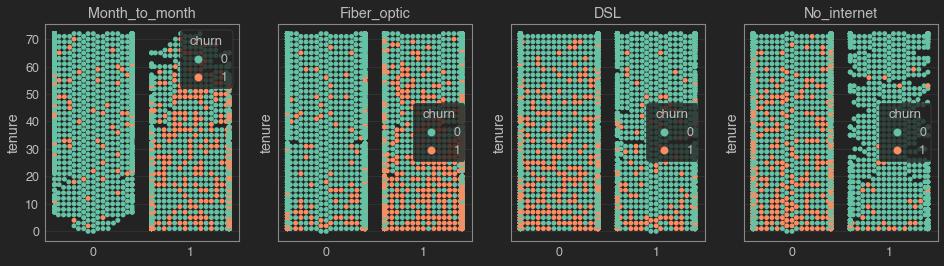

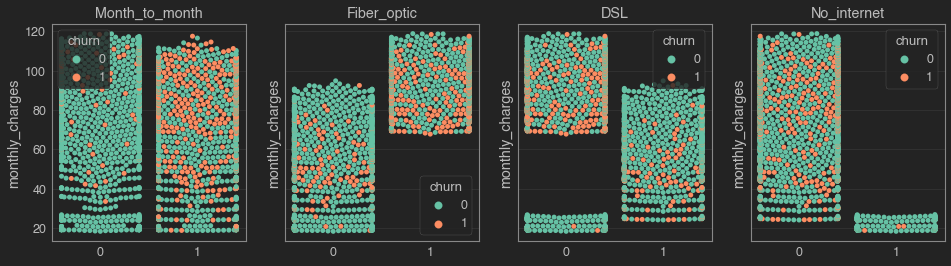

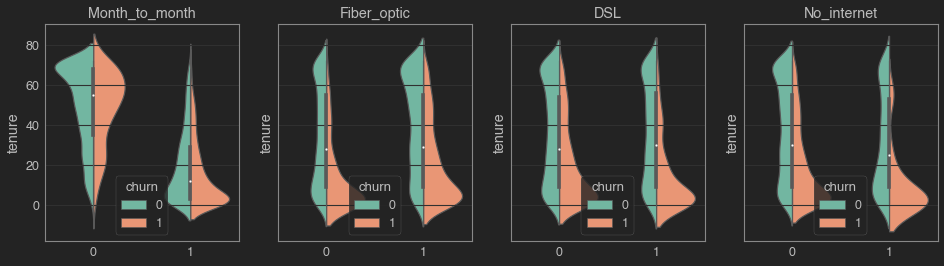

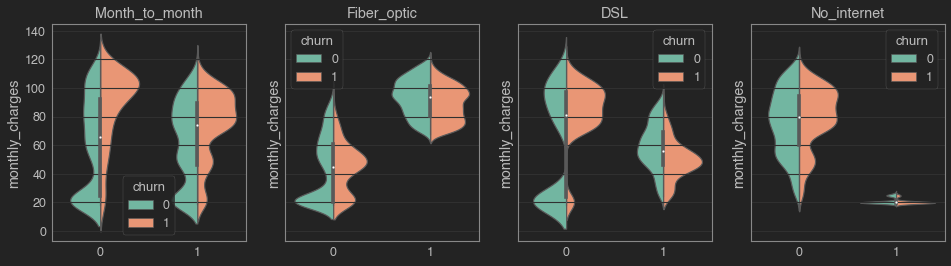

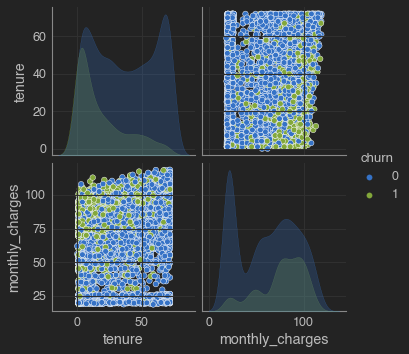

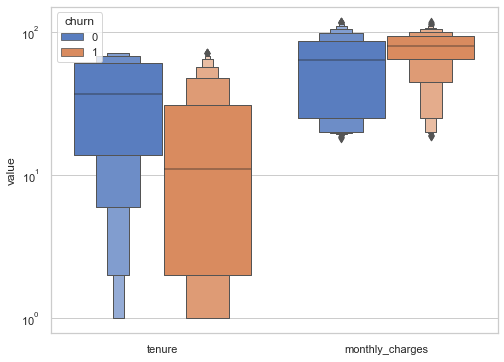

In [11]:
cat_vars = ['Month_to_month','Fiber_optic','DSL','No_internet']
quant_vars = ['tenure','monthly_charges']
explore.explore_multivariate(train,'churn', cat_vars,quant_vars)